<a href="https://colab.research.google.com/github/doodger/dataScience/blob/master/manymodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this exercise I will use a few different techniques to build predictors for the wisconcin cancer database. These shall be: a decision tree, random forest, logistic regression and naive bayes

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
#TODO split the data into training and validation, check accuracy for different types of trees
X, y = load_breast_cancer(return_X_y=True) #load dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0) #20% of data kept for testing, frozen rng seed



0.9122807017543859

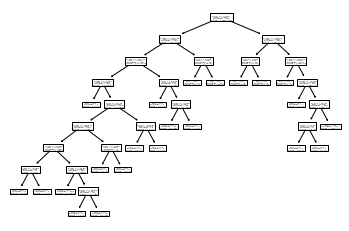

In [5]:
from sklearn import tree
model1 = tree.DecisionTreeClassifier() #unspecificed decision tree
model1 = model1.fit(X_train,y_train) #fit model
tree.plot_tree(model1)
model1.score(X_test, y_test)

In [0]:
from sklearn.ensemble import RandomForestClassifier
model2 = 

TODO: 

*   Overfitting test
*   

